<a href="https://colab.research.google.com/github/NRasquetti/Python-Prep/blob/main/ProyectoDSParteI%2BRasquetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Declaración de objetivos:

El objetivo principal de este proyecto es identificar las características de rendimiento que poseen la mayor correlación positiva con el valor actual de mercado (columna current_value) de los futbolistas, analizando la totalidad de la muestra de jugadores disponible.

Para alcanzar esta meta, se realizará un Análisis Exploratorio de Datos (EDA) enfocado en tres variables clave: la position del jugador, el rendimiento goleador (medido por la variable creada goles_por_partido) y la capacidad de creación de juego (a través de las assists).

Específicamente, se buscará determinar qué posición es la mejor valorizada y cuantificar la intensidad de la relación lineal entre el rendimiento ofensivo y el current_value mediante visualizaciones y métricas de resumen numérico.

Abstract

En el fútbol moderno, la valoración económica de los futbolistas se ha convertido en un activo estratégico fundamental que impulsa las decisiones de mercado global. Las transferencias millonarias y la planificación de carrera de los atletas dependen de una comprensión profunda de qué atributos de rendimiento se traducen en un mayor valor. En este contexto, la Ciencia de Datos emerge como una herramienta indispensable para ir más allá de la observación intuitiva y cuantificar el impacto real del desempeño individual en la tasación de un jugador.

El presente proyecto de investigación aborda el desafío de identificar las características de rendimiento con la mayor incidencia positiva sobre el valor actual de mercado (columna current_value) de un futbolista. Específicamente, se plantea la hipótesis de que una o un conjunto reducido de variables ofensivas tienen un peso significativamente mayor en la cotización de un jugador. Entender esta relación es vital, tanto para el jugador, que busca maximizar su valor, como para los clubes, que pueden detectar oportunidades de inversión inteligente.

Para testear esta premisa, se empleará un Análisis Exploratorio de Datos (EDA) detallado sobre un dataset de futbolistas de diversas ligas. El análisis se enfocará en la relación entre el current_value y tres variables clave de rendimiento: la posición de juego (position), la cantidad de asistencias (assists) y, centralmente, la métrica estandarizada goles_por_partido, previamente construida mediante Ingeniería de Características. Se generarán visualizaciones (univariadas, bivariadas y multivariadas) junto con resúmenes numéricos que permitan cuantificar la intensidad de la correlación de cada variable con el valor de mercado.

El resultado final de este análisis exploratorio será la identificación clara de la variable más influyente en la tasación, proveyendo un marco de referencia empírico que puede ser utilizado por scouts y directivos para optimizar las decisiones estratégicas en el mercado de pases.

Hipótesis Central: Existe una variable de rendimiento que pesa más que el resto en el valor actual de un jugador.

P1 (Posición): ¿Qué posición es mejor valorizada según el valor actual del jugador?

P2 (Goles): ¿Existe una relación positiva entre la cantidad de goles por partido y el valor actual del jugador? ¿En qué medida?

P3 (Asistencias): ¿Existe una relación positiva entre el número de asistencias y el valor actual del jugador? ¿En qué medida?

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Cargando DATA FRAME
df = pd.read_csv('/final_data.csv')

# Mostrar las 5 primeras filas
display(df.head())

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df.info() #Analisis de los tipos de datos y contenido del DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [10]:
df[df.isnull().any(axis=1)] #analizamos si hay valores nulos

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [58]:
# Analizaremos cual es la posición mejor paga, primero veeremos cuales son las posiciones más recurrentes, para luego simplificar la categoría

df["position"].value_counts().head(10)

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [59]:
# Simplificamos la columna de posiciones mediante una agrupación de posiciones comunes, para realizar una mejor visualizacion del analisis.

df['macro_position'] = df['position'].apply(lambda x: x.split('-')[0].strip())

# Primera corrección: Ataque
# Si la columna original 'position' contiene la palabra 'Attack',
# entonces en la nueva columna ponemos solo 'Attack'.
df['macro_position'] = np.where(
    df['position'].str.contains('Attack'),
    'Attack',
    df['macro_position']
)
# Segunra corrección: Defender
# Si la columna original 'position' contiene la palabra 'Defender',
# entonces en la nueva columna ponemos solo 'Defender'.
df['macro_position'] = np.where(
    df['position'].str.contains('Defender'),
    'Defender',
    df['macro_position']
)
# Tercera corrección: Midfield (Usamos .str.lower() para evitar errores de mayúsculas/minúsculas)
df['macro_position'] = np.where(
    df['position'].str.lower().str.contains('midfield'),
    'Midfield',
    df['macro_position']
)


In [60]:
# Corroboramos que la nueva columna tenga una agrupación simplificada
df["macro_position"].value_counts()

,count
macro_position,
Defender,3528
Midfield,3095
Attack,2902
Goalkeeper,1229


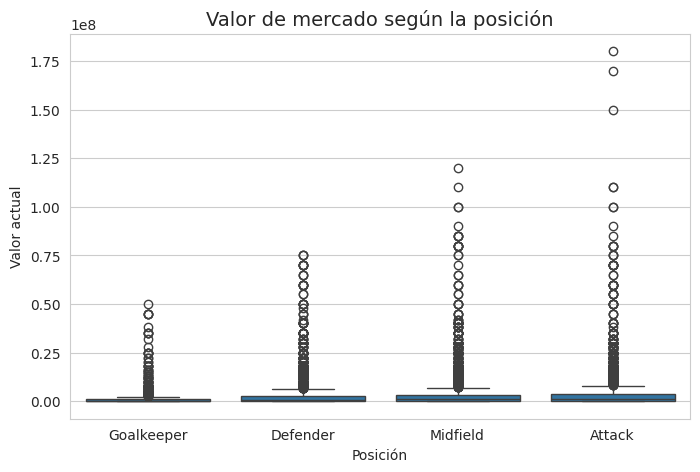

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.boxplot(x="macro_position", y="current_value", data=df)

plt.title("Valor de mercado según la posición", fontsize=14)
plt.xlabel("Posición")
plt.ylabel("Valor actual")

plt.show()

In [62]:
# En el grafico, se puede observar una enorme cantidad de ourliers que dificultan la visualización de la media, mediana y cuartiles del boxplot, por lo cual necesitaremos realizar ajustes que minimicen estas variaciones.

df['log_value'] = np.log1p(df['current_value']) #aplicamos una transformacion logarítmica

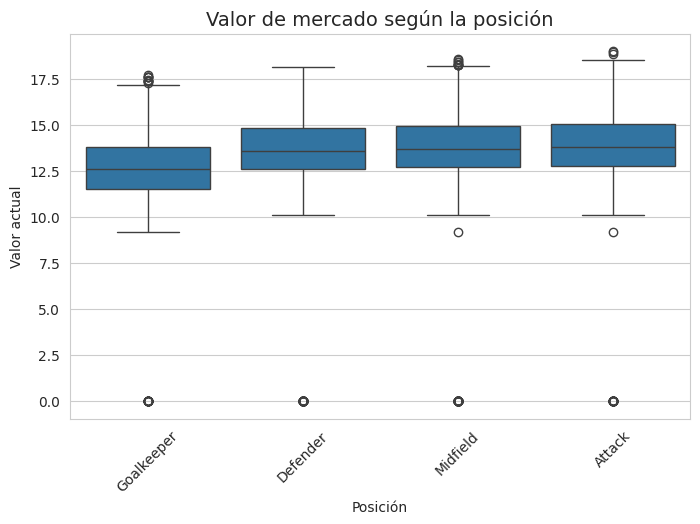

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.boxplot(x="macro_position", y="log_value", data=df)

plt.title("Valor de mercado según la posición", fontsize=14)
plt.xlabel("Posición")
plt.ylabel("Valor actual")
plt.xticks(rotation=45)

plt.show()

Primera conclusion:

"Mediante la visualización del boxplot en escala logarítmica, se observa que los delanteros (Attack) y los mediocampistas (Midfield) presentan las medianas de valor actual (log_value) más altas, aunque la diferencia entre las tres posiciones de campo (Attack, Midfield, Defender) es marginal. La posición con menor valoración es la de Arquero (Goalkeeper). Por lo tanto, se concluye preliminarmente que, si bien la posición es un factor, solo la clasificación de Arquero reduce significativamente el valor, mientras que el resto de las posiciones de campo no presentan una incidencia discriminatoria fuerte en el valor actual."


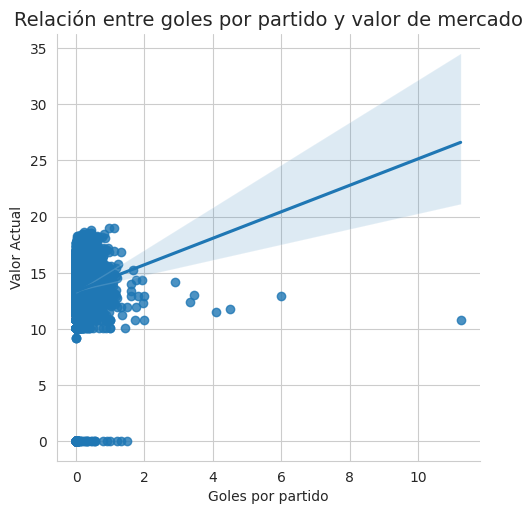

In [57]:
# Analisis de la variable goles por partido

sns.lmplot(x="goals", y="log_value", data=df)

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

En el grafico podemos observar algunos outliers que pueden deberse a que algunos jugadores hayan participado de un único partido y tener muchos goles a favor, por lo que crearemos un filtro para incluir unicamente a los jugadores con mas de 20 partidos.


In [65]:
df_filtered = df[df["appearance"] >= 20] #Creamos un filtro para que solo aparezcan jugadores con más de 20 partidos jugados en un nuevo data frame


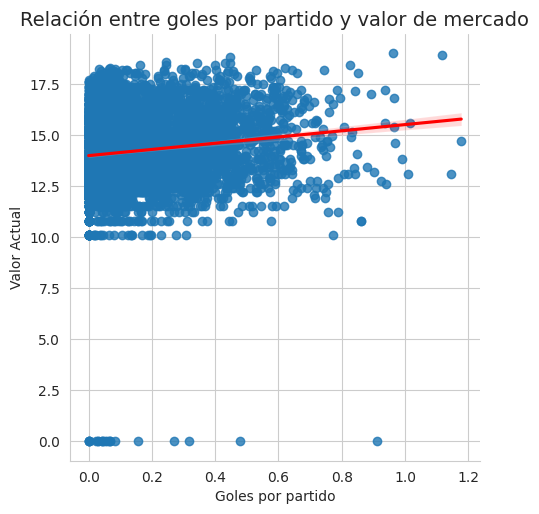

In [67]:
# Volvemos a realizar el grafico
sns.lmplot(x="goals", y="log_value", data=df_filtered, line_kws={"color": "red"})

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

In [68]:
# como visualmente el grafico continúa siendo dificil de leer, vamos a realizar una cuantificacion de esta relacion a traves del coeficiente de Pearson
df_filtered['goals'].corr(df_filtered['log_value'])

np.float64(0.14427938070836877)

Observando el coeficiente, podemos entender que hay una correlacion positiva de 0.14 en el coeficiente de Pearson entre los goles por partido y el valor de mercado del jugador. Algo contraintuitivo. Esta correlacion debil podria deberse a que estamos analizando los goles por partido para categorías de las que no se esperan goles (defensores y arqueros), que en miles de datos hacen que la tendencia vaya a 0.

In [69]:
# Corregir la relacion de goles por partido en unicamente las posiciones de attk
# Filtramos df_filtered para incluir solo Attack O Midfield
df_attack = df_filtered[
    df_filtered['macro_position'].isin(['Attack', 'Midfield'])
].copy()
df_attack['goals'].corr(df_attack['log_value'])

np.float64(0.1448093230261685)

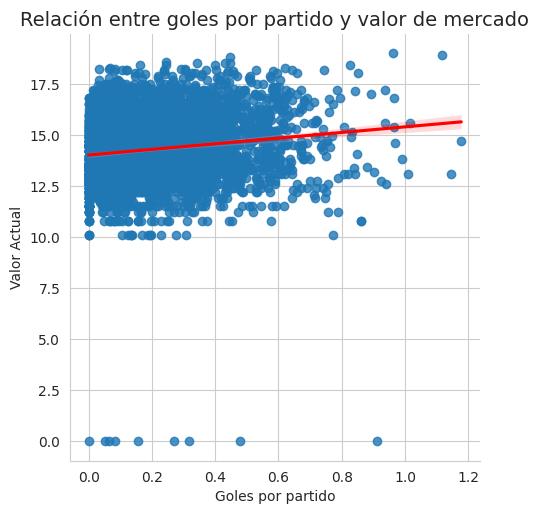

In [70]:
sns.lmplot(x="goals", y="log_value", data=df_attack, line_kws={"color": "red"})

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

A diferencia de lo que esperabamos, la correlación permaneció casi invariable. Pero la correlación sigue siendo debil

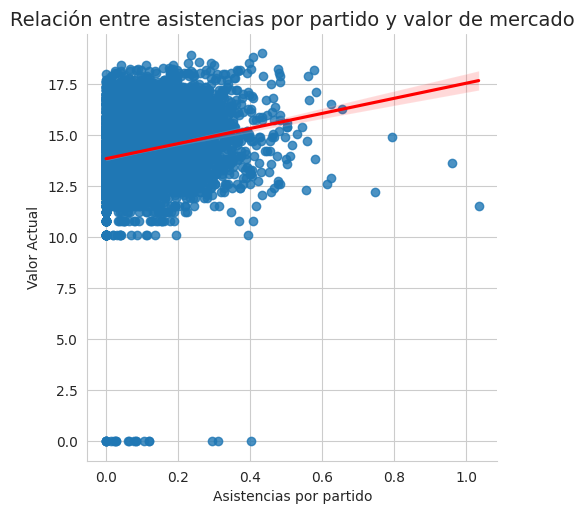

In [74]:
# Ralizaremos el mismo analisis para las asistencias
sns.lmplot(x="assists", y="log_value", data=df_filtered, line_kws={"color": "red"})

plt.title("Relación entre asistencias por partido y valor de mercado", fontsize=14)
plt.xlabel("Asistencias por partido")
plt.ylabel("Valor Actual")
plt.show()

In [73]:
df_filtered['assists'].corr(df_filtered['log_value'])

np.float64(0.2109482066695982)

En este último análisis se puede observar que hay una relacion positiba entre las asistencias por partido y el valor del jugador. Aunque también tiene una relación debil tirando a moderada segun el cociente de Pearson.

Hipótesis Central: Las Asistencias (coeficiente aprox: 0.21) tienen una mayor incidencia en el valor del jugador ofensivo que los Goles (voeficiente aprox 0.14).

Influencia General: Como ambos valores son bajos (débil a moderada), concluimos que el rendimiento ofensivo es un factor, pero no el más determinante en el precio de un jugador.

In [75]:
# Código para agrupar por macro_position y calcular la mediana del valor logarítmico
df_filtered.groupby('macro_position')['log_value'].median()

,log_value
macro_position,
Attack,14.220976
Defender,14.220976
Goalkeeper,13.527830
Midfield,14.220976


La cuantificación confirma el análisis visual: las posiciones de Ataque, Defensa y Mediocampo son estadísticamente indistinguibles en términos de su valor mediano en el mercado. El único factor fuerte en la posición es ser Arquero, cuya mediana de valor es significativamente más baja (13.52 vs 14.22).

/tmp/ipython-input-1090524799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


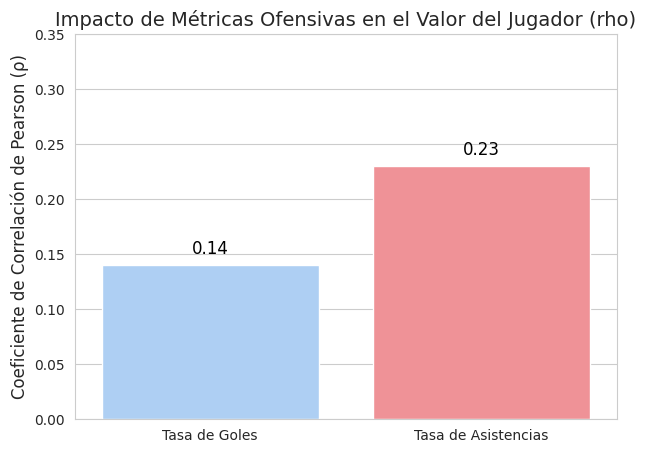

In [77]:
# 1. Crear un DataFrame con los resultados
data_rho = {
    'Variable de Rendimiento': ['Tasa de Goles', 'Tasa de Asistencias'],
    'Coeficiente de Correlación (rho)': [0.14, 0.23] # Mis resultados
}
df_rho = pd.DataFrame(data_rho)

# 2. Generar el Gráfico de Barras (Barplot)
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Variable de Rendimiento',
    y='Coeficiente de Correlación (rho)',
    data=df_rho,
    palette=['#a2cffe', '#ff8289'] # Colores distintivos
)

# Añadir etiquetas de valor directamente sobre las barras
for index, row in df_rho.iterrows():
    plt.text(row.name, row['Coeficiente de Correlación (rho)'] + 0.01, # Posición del texto
             f"{row['Coeficiente de Correlación (rho)']:.2f}", # Formato con 2 decimales
             color='black', ha="center", fontsize=12)

plt.title("Impacto de Métricas Ofensivas en el Valor del Jugador (rho)", fontsize=14)
plt.ylim(0, 0.35) # Para enfocar bien la diferencia
plt.xlabel("") # Limpiamos la etiqueta X, el título ya la explica
plt.ylabel("Coeficiente de Correlación de Pearson (ρ)", fontsize=12)
plt.show()

Conclusión:

Podemos observar que dentro de la categoría posición no se presentan diferencias cuantitativas en cuanto al valor de mercado del jugador, a menos en la posicion de Arquero donde sí, el valor del jugador es sustancialmente menor.

Es decir, descontando al arquero, la posición del jugador no interviene significativamente en el valor del mismo.

El análisis cuantitativo ya nos había arrojado una conclusión al respecto a la incidencia de los goles y las asistencias en el valor de mercado de los jugadores, siendo más alta y de incidencia moderada la Tasa de Asistencias.

El gráfico antes presentado, da una visualización de esas proporciones.

En resumen, podemos decir que de las variables estudiadas,la que mayor incidencia tiene en el valor de mercado de cada jugador es la variable asistencias.